<a href="https://colab.research.google.com/github/fdac25/trading/blob/main/src/forbesFinder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import requests
from bs4 import BeautifulSoup
import re
import time

In [ ]:
# Google search url
search_url = "https://www.google.com/search?q=allintitle:+nvidia+site:forbes.com&lr=&sca_esv=827bd599c16e32c5&as_qdr=all&tbs=sbd:1&tbm=nws&ei=kmbtaPyvCeurwbkP3e7UkQo&start=0&sa=N&ved=2ahUKEwj8wO6Sh6KQAxXrVTABHV03NaI4ChDy0wN6BAgFEAQ&biw=2048&bih=1026&dpr=1.25"

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <title>
   allintitle: nvidia site:forbes.com - Google Search
  </title>
  <script nonce="asua-94r8pfp4LSg0Sj4YA">
   (function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a=c==="1"||c==="q"&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if(a.tagName==="A"){a=a.getAttribute("data-nohref")==="1";break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){window.google=window.google||{};var a=window.performance&&window.performance.timing&&"navigationStart"in window.performance.timing,b=google.stvsc&&google.stvsc.ns,c=a?b||window.performance.timing.navigationStart:
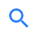
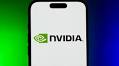
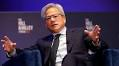
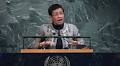
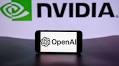
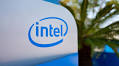

In [ ]:
# NOTE: if this cell shows the html for a CAPTCHA page, the runtime needs to be disconnected, deleted, and reconnected

# Get html from url
response = requests.get(search_url)
soup = BeautifulSoup(response.content, 'html.parser')

# Print html
print(soup.prettify())

In [ ]:
# Link extraction

# Find first occurance of a char in a string
def find_first(s, c):
  for i in range(len(s)):
    if(s[i] == c): return i
  return -1

# Find all elements containing Forbes news article links
links = soup.find_all(href=re.compile("https://www.forbes.com/sites"))

# Extract news links and titles
extracted_links = []
for link in links:
    href = link.get("href")
    href = href[find_first(href, '=')+1: find_first(href, '&')] # Trim unnecessary parts of link
    text = link.get_text()
    if href: # Ensure the href attribute exists
        extracted_links.append({"href": href, "text": text})

for link_data in extracted_links:
  print(link_data['text'])
  print("  " + str(link_data['href']))
  print("")

OpenAI’s Strategic Shift: What The AMD And Nvidia Partnerships SignalForbesOpenAI's new play in the market by investing in AMD and Nvidia.4 days ago
  https://www.forbes.com/sites/solrashidi/2025/10/09/openais-strategic-shift-what-the-amd-and-nvidia-partnerships-signal/

Nvidia Stock 2x To $350?ForbesNvidia's remarkable earnings growth (with EPS anticipated to increase by nearly 50% this year), its leading role in accelerated computing, and the...6 days ago
  https://www.forbes.com/sites/greatspeculations/2025/10/07/nvidia-stock-2x-to-350/

The Lesson from Intel And Nvidia: Choose Action Over AnxietyForbesToo many leaders fall into the same trap. They notice the world shifting and it sparks anxiety. Instead of acting, they retreat into the comfort of...1 week ago
  https://www.forbes.com/sites/devpatnaik/2025/10/06/the-lesson-from-intel-and-nvidia-choose-action-over-anxiety/

Nvidia Stock Up 1,124%. Other Winners And Whether To Buy $NVDAForbesNvidia shares are up 29% this year and 1,12

In [ ]:
# Complete script - iterate over multiple google search pages
base_url = "https://www.google.com/search?q=allintitle:+nvidia+site:forbes.com&lr=&sca_esv=827bd599c16e32c5&as_qdr=all&tbs=sbd:1&tbm=nws&start=0"
extracted_links = []
max_search = 999

for i in range(max_search):
  # Replace "start=X" in base url to iterate through pages
  url = base_url.replace("start=0", "start=" + str(i * 10))

  # Get html from url
  response = requests.get(url)
  soup = BeautifulSoup(response.content, 'html.parser')

  # Find all elements containing Forbes news article links
  links = soup.find_all(href=re.compile("https://www.forbes.com/sites"))

  # Extract news links and titles
  for link in links:
      href = link.get("href")
      href = href[find_first(href, '=')+1: find_first(href, '&')]
      text = link.get_text()
      if href: # Ensure the href attribute exists
          extracted_links.append(href)

  # Print status
  print(f"Extracted {len(links)} links from search page {i+1}")
  if len(links) == 0:
    print(" ! ZERO LINKS EXTRACTED - ENDING SEARCH")
    break
  # time.sleep(1)

# # Find and remove duplicates
# num_links = len(extracted_links)
# extracted_links = set(extracted_links)
# num_dup = num_links - len(extracted_links)

# Print results
for link_data in extracted_links:
  # print(link_data['text'])
  print("" + str(link_data))
  # print("")
print(f"Found {len(extracted_links)} links")


Extracted 10 links from search page 1
Extracted 10 links from search page 2
Extracted 8 links from search page 3
Extracted 10 links from search page 4
Extracted 10 links from search page 5
Extracted 9 links from search page 6
Extracted 10 links from search page 7
Extracted 10 links from search page 8
Extracted 10 links from search page 9
Extracted 10 links from search page 10
Extracted 10 links from search page 11
Extracted 10 links from search page 12
Extracted 10 links from search page 13
Extracted 10 links from search page 14
Extracted 10 links from search page 15
Extracted 10 links from search page 16
Extracted 10 links from search page 17
Extracted 10 links from search page 18
Extracted 9 links from search page 19
Extracted 9 links from search page 20
Extracted 10 links from search page 21
Extracted 10 links from search page 22
Extracted 10 links from search page 23
Extracted 10 links from search page 24
Extracted 10 links from search page 25
Extracted 9 links from search page 26


In [ ]:
import pandas as pd

# Export links as CSV
df_final = pd.DataFrame(extracted_links, columns=['Link'])
df_final.to_csv('forbes_search.csv', index=True)
df_final.head(10)

,Link
0,https://www.forbes.com/sites/solrashidi/2025/1...
1,https://www.forbes.com/sites/greatspeculations...
2,https://www.forbes.com/sites/devpatnaik/2025/1...
3,https://www.forbes.com/sites/petercohan/2025/0...
4,https://www.forbes.com/sites/saibala/2025/09/2...
5,https://www.forbes.com/sites/greatspeculations...
6,https://www.forbes.com/sites/iainmartin/2025/0...
7,https://www.forbes.com/sites/paulocarvao/2025/...
8,https://www.forbes.com/sites/antoniopequenoiv/...
9,https://www.forbes.com/sites/daniellechemtob/2...
